<h1>Note Detection using Spectral Peak Tracking</h1>
<h2>In this approach, we identify the peaks of the spectrogram, extract its frequencies and convert it into its corresponding note.</h2>

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, find_peaks


In [226]:
AUDIO_FILE = '/Users/aditirajesh/Desktop/program_files/Final_Project/Recordings/002.Raknanki/Raknanki_freq40_1.wav'
FFT_WINDOW_SECONDS = 1.44  # How many seconds of audio make up an FFT window
fs, data = wavfile.read(AUDIO_FILE)  # Load the data

# Calculate frame size in samples based on the sample rate and desired window duration
frame_size = int(fs * FFT_WINDOW_SECONDS)  # Samples per FFT window
hop_size = frame_size # 50% overlap to capture more detail

FREQ_MIN = 10
FREQ_MAX = 1000

NOTE_NAMES = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
MIN_TIME_BETWEEN_SAME_NOTE = 1.44 


In [227]:
def freq_to_number(f): return 69 + 12*np.log2(f/440.0)
def note_name(n,NOTE_NAMES): return NOTE_NAMES[int(n % 12)] + str(int(n/12 - 1))


In [228]:
def frequency_to_note_name(freq):
    """Convert a frequency in Hz to the nearest musical note."""
    if freq <= 0:
        return None
    
    # Calculate the number of semitones away from A4 (440 Hz)
    semitones_away_from_A4 = 12 * np.log2(freq / 440.0)
    
    # Round to the nearest semitone
    note_index = int(round(semitones_away_from_A4))
    
    # Calculate the corresponding octave and note
    note_name = NOTE_NAMES[(note_index % 12)]
    octave = 4 + (note_index // 12)
    
    # Adjust the octave if the note is below A4
    if note_index < 0:
        octave -= 1
    
    return f"{note_name}{octave}"


In [229]:
sample_rate, audio_data = wavfile.read(AUDIO_FILE)
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

In [230]:
frame_size = int(sample_rate * FFT_WINDOW_SECONDS)
hop_size = frame_size // 2 

In [231]:
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, window='hann', nperseg=frame_size, noverlap=frame_size - hop_size)
Sxx_dB = 10 * np.log10(Sxx + 1e-10)  # Add a small constant to avoid log(0)


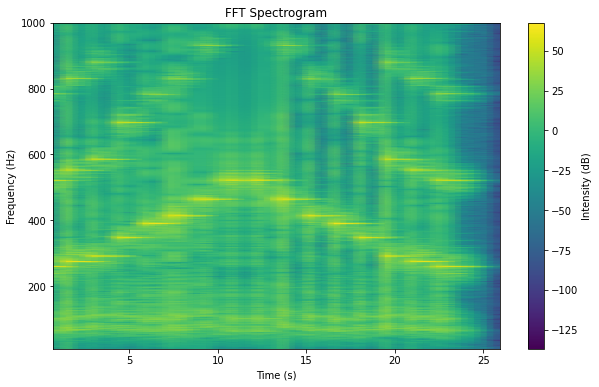

In [232]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Intensity (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(FREQ_MIN, FREQ_MAX)  # Limit to your frequency range of interest
plt.title('FFT Spectrogram')
plt.show()

In [233]:
dominant_freqs = []
for i in range(len(times)):
    # Find peaks in the current time slice
    peaks, properties = find_peaks(Sxx_dB[:, i], height=-40)  

    if len(peaks) > 0:
        sorted_peaks = sorted(peaks, key=lambda p: properties["peak_heights"][np.where(peaks == p)[0][0]], reverse=True)

        rounded_time = round(times[i] / FFT_WINDOW_SECONDS) * FFT_WINDOW_SECONDS
        fundamental_freq = frequencies[sorted_peaks[0]]

        if not dominant_freqs or dominant_freqs[-1][0] != rounded_time:
            n = int(round(freq_to_number(fundamental_freq)))
            note = note_name(n,NOTE_NAMES)
            dominant_freqs.append((rounded_time,times[i],fundamental_freq,note))

In [234]:
for i in dominant_freqs:
    print(i)

(0.0, 0.72, 261.80555555555554, 'C4')
(1.44, 1.44, 277.0833333333333, 'C#4')
(2.88, 2.16, 277.0833333333333, 'C#4')
(4.32, 4.32, 293.75, 'D4')
(5.76, 5.04, 349.30555555555554, 'F4')
(7.199999999999999, 6.48, 392.3611111111111, 'G4')
(8.64, 7.92, 415.27777777777777, 'G#4')
(10.08, 10.08, 466.66666666666663, 'A#4')
(11.52, 10.8, 523.6111111111111, 'C5')
(12.959999999999999, 12.96, 524.3055555555555, 'C5')
(14.399999999999999, 13.68, 465.97222222222223, 'A#4')
(15.84, 15.84, 415.27777777777777, 'G#4')
(17.28, 16.56, 392.3611111111111, 'G4')
(18.72, 18.72, 349.30555555555554, 'F4')
(20.16, 19.44, 293.75, 'D4')
(21.599999999999998, 21.6, 277.0833333333333, 'C#4')
(23.04, 22.32, 277.0833333333333, 'C#4')
(24.48, 24.48, 261.80555555555554, 'C4')
(25.919999999999998, 25.2, 261.1111111111111, 'C4')


In [235]:
notes = []
for i in dominant_freqs:
    print((i[3],i[1]))

('C4', 0.72)
('C#4', 1.44)
('C#4', 2.16)
('D4', 4.32)
('F4', 5.04)
('G4', 6.48)
('G#4', 7.92)
('A#4', 10.08)
('C5', 10.8)
('C5', 12.96)
('A#4', 13.68)
('G#4', 15.84)
('G4', 16.56)
('F4', 18.72)
('D4', 19.44)
('C#4', 21.6)
('C#4', 22.32)
('C4', 24.48)
('C4', 25.2)
